In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import matplotlib.colors as colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import copy
import math
import sys
import time
import pandas as pd

In [2]:
# Define the font family and size
font = {'family' : 'serif', 'size' : 20 }
mpl.rc('font', **font)
mpl.rcParams['mathtext.fontset'] = 'cm' # Set the math font to Computer Modern
mpl.rcParams['legend.fontsize'] = 1

# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')


In [23]:
c = 3e8
m_e = .511 # MeV/c^2
m_mu = 105.7 # MeV/c^2
d = 100 # m

m_l=m_e

m_A_min  = m_l*2 # MeV
m_A_line_pi0 = 134.97685/2 # MeV
m_A_line_eta = 537.862/2 # MeV
m_A_max  = 3*1000 # MeV
m_A      = 0.1 # MeV
deltaE_min = 10#1e-12 # MeV
deltaE_max =  3*1000 # MeV
nPoints_x = 20#600
nPoints_y = 20#1000

For reference, it takes a photon 3e-06 s or 3000.0 ns to travel 900 m in an external frame


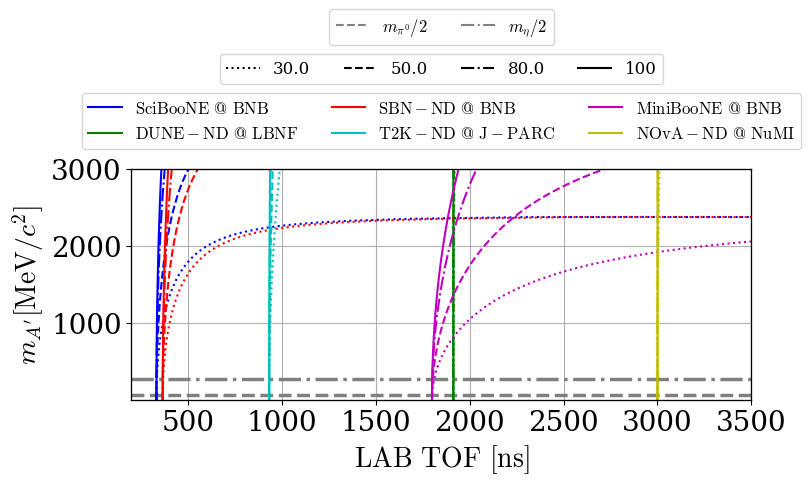

In [66]:
tScale = 1e-9
lab = True

print('For reference, it takes a photon',d/c,'s or',d/c/tScale,'ns to travel',d,'m in an external frame')

experiments = [(  8, 100, r'$\mathrm{SciBooNE }$ $\mathrm{@}$ $\mathrm{BNB   }$','b'),
               (120, 574, r'$\mathrm{DUNE-ND  }$ $\mathrm{@}$ $\mathrm{LBNF  }$','g'),
               (  8, 110, r'$\mathrm{SBN-ND   }$ $\mathrm{@}$ $\mathrm{BNB   }$','r'),
               ( 30, 280, r'$\mathrm{T2K-ND   }$ $\mathrm{@}$ $\mathrm{J-PARC}$','c'),
               (  8, 540, r'$\mathrm{MiniBooNE}$ $\mathrm{@}$ $\mathrm{BNB   }$','m'),
               (120, 900, r'$\mathrm{NOvA-ND  }$ $\mathrm{@}$ $\mathrm{NuMI  }$','y')]
percentEs = [(0.3,'dotted'),(0.5,'dashed'),(0.8,'dashdot'),(1,'solid')]

points = []
fig, ax = plt.subplots(figsize=(8, 3))
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_yticklabels([])

ax3 = ax.twinx()
ax3.set_yticks([])
ax3.set_yticklabels([])

ax.axhline(m_A_line_pi0, color='gray', linestyle='--',linewidth=2.5)
ax3.plot([],[],color='gray',linestyle='--',label=r'$m_{\pi^0}/2$')
ax.axhline(m_A_line_eta, color='gray', linestyle='-.',linewidth=2.5)
ax3.plot([],[],color='gray',linestyle='-.',label=r'$m_{\eta}/2$')

x = np.linspace(m_A_min,m_A_max,100)

first = True
legendHandles = []
for E,d,name,color in experiments:
    E = E * 1000 # GeV --> MeV
    # E = E / 100
    for percentE,style in percentEs:
        points.append([])
        for m in np.linspace(m_A_min, E*percentE, 100):#nPoints_x):
            g = E*percentE/m
            if g == 1: g = 1.000000001
            v=(c**2-c**2/g**2)**(1/2)
            t = (d/g)/v/tScale
            if lab: t = t*g
            points[-1].append((m,t))
        label = None
        if percentE == 1:
            label = name
        ax.plot([t for m,t in points[-1]], [m for m,t, in points[-1]], label=label, color=color, linestyle=style)
        if first: ax2.plot([], [], linestyle=style,color='black',label=str(percentE*100))
        if name == experiments[-1][2]:
            legendHandles.append(Line2D([], [], color='black', linestyle=style, label=(str(int(percentE*100)))+'%'))
    first=False

if lab: ax.set_xlim(200,3500)
else: ax.set_xlim(0,100)

ax.set_ylim(m_A_min,m_A_max)
ax.set_ylabel(r"$m_{A'}\mathrm{ [MeV}/c^2\mathrm{]}$")
if lab: ax.set_xlabel(r'$\mathrm{LAB}$ $\mathrm{TOF}$ $\mathrm{[ns]}$')
else: ax.set_xlabel(r'$\mathrm{CM}$ $\mathrm{TOF}$ $\mathrm{[ns]}$')

ax.set_title(r'')

ax .legend(fontsize=12,loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)
ax2.legend(fontsize=12,loc='lower center', bbox_to_anchor=(0.5, 1.33), ncol=4)
ax3.legend(fontsize=12,loc='lower center', bbox_to_anchor=(0.5, 1.50), ncol=2)

ax.grid(True)

if lab: plt.savefig('TOF_LAB.pdf',bbox_inches='tight')
else: plt.savefig('TOF_CM.pdf',bbox_inches='tight')

plt.show()